# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [471]:
# Импортируем библиотеки и прочитаем данные.

import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.options.display.max_rows = None

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

# Выведем первые 5 строк.

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [472]:
# Изучим общую информацию о полученном датафрейме.

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


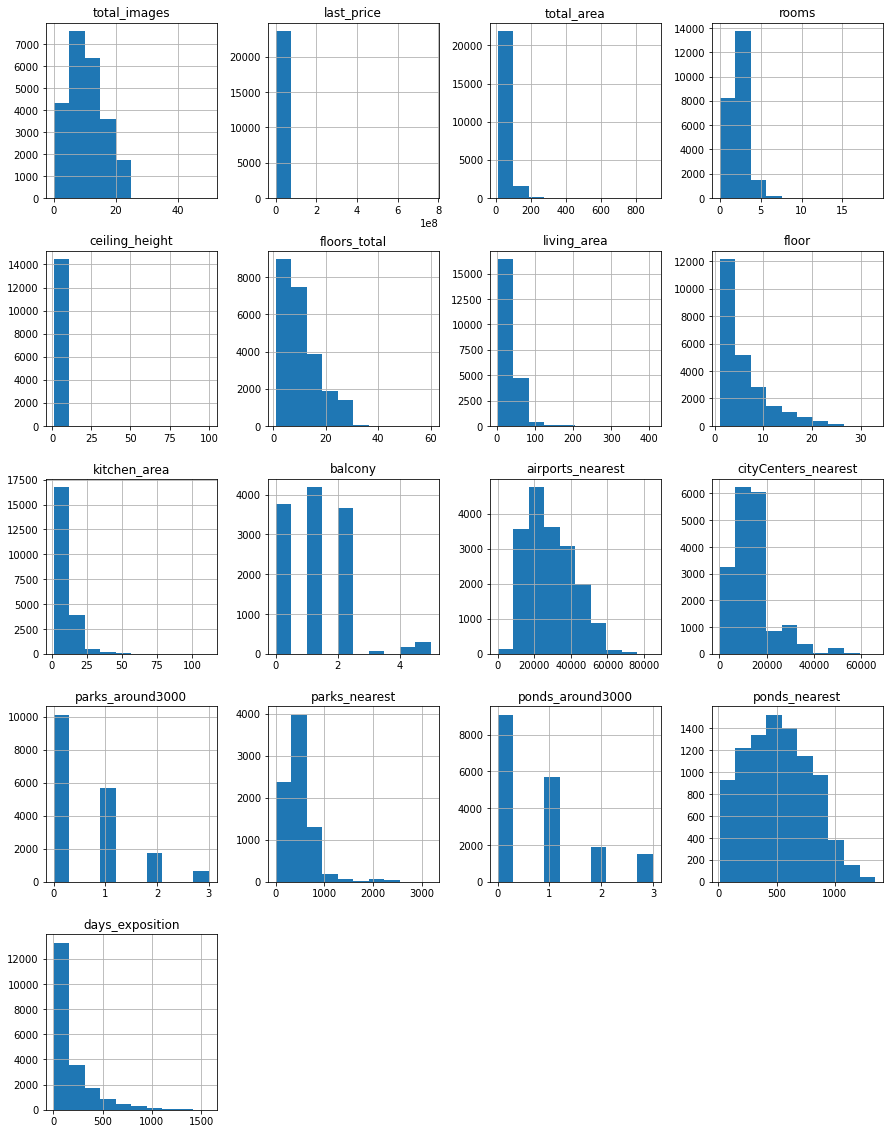

In [473]:
# Пострим гистограммы.

hist_list = list(data.select_dtypes(include=['int64', 'float64']).columns)
data[hist_list].hist(figsize=(15, 20))
plt.show()

Получен датафрейм. Изучены данные.

### Выполните предобработку данных

In [474]:
# Определим, в каких столбцах есть пропуски.

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [475]:
# Приведем наименование столбцов к общему виду. 

data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [476]:
# Заполним пропущенные значения.

# Если продавец не указал число балконов, то, скорее всего, их нет. Такие пропуски можно заменить на 0. В целом, можно оставить
# пропуски без изменений.

data['balcony'] = data['balcony'].fillna(0)

# Предположим, что высота потолков отличается не очень сильно от дома к дому.

print(data['ceiling_height'].median())
print(data['ceiling_height'].mean())

2.65
2.77149889685604


In [477]:
# Тогда, мы можем заполнитть пропуски в этом столбце.

data['ceiling_height'].fillna(data['ceiling_height'].mean(),inplace=True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.771499,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.771499,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.771499,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [478]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [479]:
# Пропуски в столбце "locality_name". 
# Нельзя точно определить Санкт-Петербург или поселок Шушары. Значений всего 49. 
# Удаляем.
# Можно, наверное, но нужно будет сделать "усредненный объект недвижимости" по всем населенным пунктам и сравнить с каждым, 
# где есть пропуск в местоположении. Но для 49 значений - это лишнее."

data.dropna(subset=['locality_name'], inplace=True)

In [480]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around_3000        5510
parks_nearest           15586
ponds_around_3000        5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [481]:
# Пропуски в столбце "is_apartment".
# При покупке объекта недвижимости, например, квартиры, для многих будет иметь решаюшее значение то, является ли объект 
# недвижимости квартирой или аппартаментами. В нашем исследовании это играет не очень значительную роль. В целом, 
# можно оставить пропуски без изменений.

print(data['is_apartment'].unique())

[nan False True]


In [482]:
data['is_apartment']=data['is_apartment'].fillna(False)
print(data['is_apartment'].unique())

[False  True]


In [483]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around_3000        5510
parks_nearest           15586
ponds_around_3000        5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [484]:
# Пропуски в столбце "floors_total".
# Предлагается опеределить медиану этажности по каждому району и установить соответсвующее значение на месте пропусков.

#for locality_name in data['locality_name'].unique():
#    data.loc[(data['locality_name'] == locality_name) & (data['floors_total'].isna()), 'floors_total'] = \
#    data.loc[(data['locality_name'] == locality_name), 'floors_total'].median()

# Далее нужно будет проставить категории этажей. Не будем заполнять пропуски.

In [485]:
# Дело в том, что в исходном датафрейме существуют населенные пункты (срезы без данных), в которых расположены объекты 
# недвижимости без указания расстояния до аэропорта, городского центра и другие данные. 
# Отсюда следует, что невозможно установить среднее значение или медиану по некоторым локациям.
# Но это не значит, что мы не можем заполнить те пропуски, где есть хоть какие-то данные. Для этого нужно сформировать 
# спискок населенных пунктов, по которым считается медиана и в теле цикла поставить условие о вхождении локации
# в этот список. Остальные пропуски оставить без изменения.
# Для целей исследования нам необходимо заполнить, где это возможно, пропуски в следующих столбцах. Остальные оставим.
# Пропуски в столбцах "city_centers_nearest", "parks_nearest", "days_exposition".

In [486]:
# for locality_name in data['locality_name'].unique():
#     if locality_name in data.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc='median').index:
#         data.loc[(data['locality_name'] == locality_name) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
#         data.loc[(data['locality_name'] == locality_name), 'city_centers_nearest'].median()

# for locality_name in data['locality_name'].unique():
#     if locality_name in data.pivot_table(index='locality_name', values='parks_nearest', aggfunc='median').index:
#         data.loc[(data['locality_name'] == locality_name) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
#         data.loc[(data['locality_name'] == locality_name), 'parks_nearest'].median()

# for locality_name in data['locality_name'].unique():
#     if locality_name in data.pivot_table(index='locality_name', values='days_exposition', aggfunc='median').index:
#         data.loc[(data['locality_name'] == locality_name) & (data['days_exposition'].isna()), 'days_exposition'] = \
#         data.loc[(data['locality_name'] == locality_name), 'days_exposition'].median()

# data.isna().sum()

In [487]:
def func(columns_list):
    unique = data['locality_name'].unique()
    for column in columns_list:
        calculated_locations = data.pivot_table(index='locality_name', values=column, aggfunc='median').index
        for locality_name in unique:
            if locality_name in calculated_locations:
                data.loc[(data['locality_name'] == locality_name) & (data[column].isna()), column] = \
                data.loc[(data['locality_name'] == locality_name), column].median()
                
func(["city_centers_nearest", "parks_nearest", "days_exposition"])

In [488]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5386
parks_around_3000        5510
parks_nearest            5998
ponds_around_3000        5510
ponds_nearest           14565
days_exposition            80
dtype: int64

In [489]:
# Если аналогично поступить со столбцом "ponds_nearest", то останется, примерно, около 5000 пропусков.
# Т.е в шести столбцах по одинаковому количеству пропусков. Эти данные рассчитыватся автоматически.
# есть предположение, что это отдаленные населенные пункты с отсутствием парков и водоемов, 
# для которых расчет до центра и аэропорта не осуществляется.

In [490]:
# Пропуски в столбцах "living_area" и "kitchen_area". 
# В жилую площадь квартиры входит сумма площадей помещений, пригодных для проживания: спальни, гостиной, 
# столовой, если она не совмещена с кухней, детской комнаты, кабинета. Вспомогательные помещения, к которым относятся 
# санузел, кухня, кладовка, коридор, гардеробная, постирочная, не учитываются при подсчёте жилой площади. 
# У нас нет пропусков в столбце "total_area", что позволяет пренебречь пропусками в столбцах "living_area" и "kitchen_area".

# Допустим, что в районах преобладает типичная застройка. Получается, что мы можем определить примерное соотношение
# жилой площади от общей. Также поступить с площадью кухни. Или площадь кухни соотнсти с жилой площадью. Есть предположение, 
# площадь кухни составляет, примерно, треть жилой. В среднем.

In [491]:
d = data.pivot_table(index='locality_name', values=['kitchen_area', 'living_area', 'total_area'], aggfunc='median')
d['percent_living_area_total_area'] = d['living_area']/d['total_area']*100
d['percent_kitchen_area_total_area'] = d['kitchen_area']/d['total_area']*100
print(d['percent_living_area_total_area'].median())
print(d['percent_kitchen_area_total_area'].median())

59.18650793650794
15.838867221812306


In [492]:
for locality_name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == locality_name) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['locality_name'] == locality_name) & (data['living_area'].isna()), 'total_area'] * 0.6
    
    data.loc[(data['locality_name'] == locality_name) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['locality_name'] == locality_name) & (data['kitchen_area'].isna()), 'total_area'] * 0.15

In [493]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5386
parks_around_3000        5510
parks_nearest            5998
ponds_around_3000        5510
ponds_nearest           14565
days_exposition            80
dtype: int64

Предполагаю, что отсутствие данных связано как с естественными причиным, так и ошибочной работой автоматического определния
характеристик системой. Что я имею ввиду.
Естественные причины. Не все объекты имеют полный набор характеристик: если у объекта недвижимости нет балкона, то пользователь пропустит это поле, но тут другой вопрос появляется. Почему в логике фронта сервиса не предусмотрено автоматическое проставление "0".
Работа системы. Скорее всего, существуют объекты недвижимости, у которых не могут быть посчитаны такие характеристики, как расстояние до ближайшего пруда или прака, потому, что их в этом населенном пунтке просто нет.

In [494]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [495]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

Изменил тип данных в столбце "first_day_exposition" с типа данных string(object) на тип данных datetime.

In [496]:
print(len(data['locality_name'].unique())) # Посчитаем количество уникальных наименований населенных пунктов.

364


In [497]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [498]:
# Обработаем неявные дубликаты

data = data.replace(
    {'locality_name':
     {'поселок Тельмана':'посёлок Тельмана', 
      'Никольское':'село Никольское', 
      'городской посёлок Советский':'посёлок городского типа Советский', 
      'городской посёлок Большая Ижора':'посёлок городского типа Большая Ижора', 
      'городской посёлок Лесогорский':'посёлок городского типа Лесогорский', 
      'посёлок Рябово':'посёлок городского типа Рябово', 
      'городской посёлок Мга':'посёлок городского типа Мга', 
      'городской посёлок Павлово':'посёлок городского типа Павлово', 
      'городской посёлок Назия':'посёлок городского типа Назия', 
      'коттеджный посёлок Лесное':'посёлок Лесное', 
      'Мурино':'посёлок Мурино',
      'Любань':'посёлок Любань', 
      'городской посёлок Рощино':'посёлок городского типа Рощино', 
      'деревня Кудрово':'Кудрово'}
    }
)

data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')
data.duplicated().sum()

0

In [499]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Новая Ладога', 'Отрадное', 'Павловск',
       'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск',
       'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Будогощь', 'городской поселок Виллози',
       'городской поселок Новоселье', 'городской поселок Свирьстрой',
       'городской поселок Фёдоровское', 'городской поселок Янино-1',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие 

In [500]:
print(len(data['locality_name'].unique())) # Посчитаем количество уникальных наименований населенных пунктов.

319


Заполнены пропуски, где это было возможно и необходимо. Обнаружил срезы без данных. Поменял тип данных дат публикации.
Выявил неявные дубликаты, заменил.

### Добавьте в таблицу новые столбцы

In [501]:
# Добавляем столбцы.

data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2) # цена одного квадратного метра
data['weekday']=data['first_day_exposition'].dt.weekday # день недели публикации объявления
data['month']=data['first_day_exposition'].dt.month # месяц публикации объявления
data['year']=data['first_day_exposition'].dt.year # год публикации объявления

In [502]:
# Функция категоризации этажей.

def get_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(get_floor_type, axis=1) # вызываем для каждой строчки функцию get_floor_type

In [503]:
# Расстояние до центра города в километрах.

data.loc[~(data['city_centers_nearest'].isna()), 'city_centers_nearest_km'] = \
(data.loc[~(data['city_centers_nearest'].isna()), 'city_centers_nearest'] / 1000).round()

In [504]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11.0,18.6,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5.0,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14.0,95.4,9,False,False,False,23.85,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


Добавил дополнительные столбцы согласно заданию. Написал функцию для категоризации этажей.

### Проведите исследовательский анализ данных

Изучим перечисленные ниже параметры объектов и построем отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. Исправим их или удалим.

Список параметров:

    общая площадь;
    жилая площадь;
    площадь кухни;
    цена объекта;
    количество комнат;
    высота потолков;
    тип этажа квартиры («первый», «последний», «другой»);
    общее количество этажей в доме;
    расстояние до центра города в метрах;
    расстояние до ближайшего парка.


In [505]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23650 non-null  int64         
 1   last_price               23650 non-null  float64       
 2   total_area               23650 non-null  float64       
 3   first_day_exposition     23650 non-null  datetime64[ns]
 4   rooms                    23650 non-null  int64         
 5   ceiling_height           23650 non-null  float64       
 6   floors_total             23565 non-null  float64       
 7   living_area              23650 non-null  float64       
 8   floor                    23650 non-null  int64         
 9   is_apartment             23650 non-null  bool          
 10  studio                   23650 non-null  bool          
 11  open_plan                23650 non-null  bool          
 12  kitchen_area             23650 n

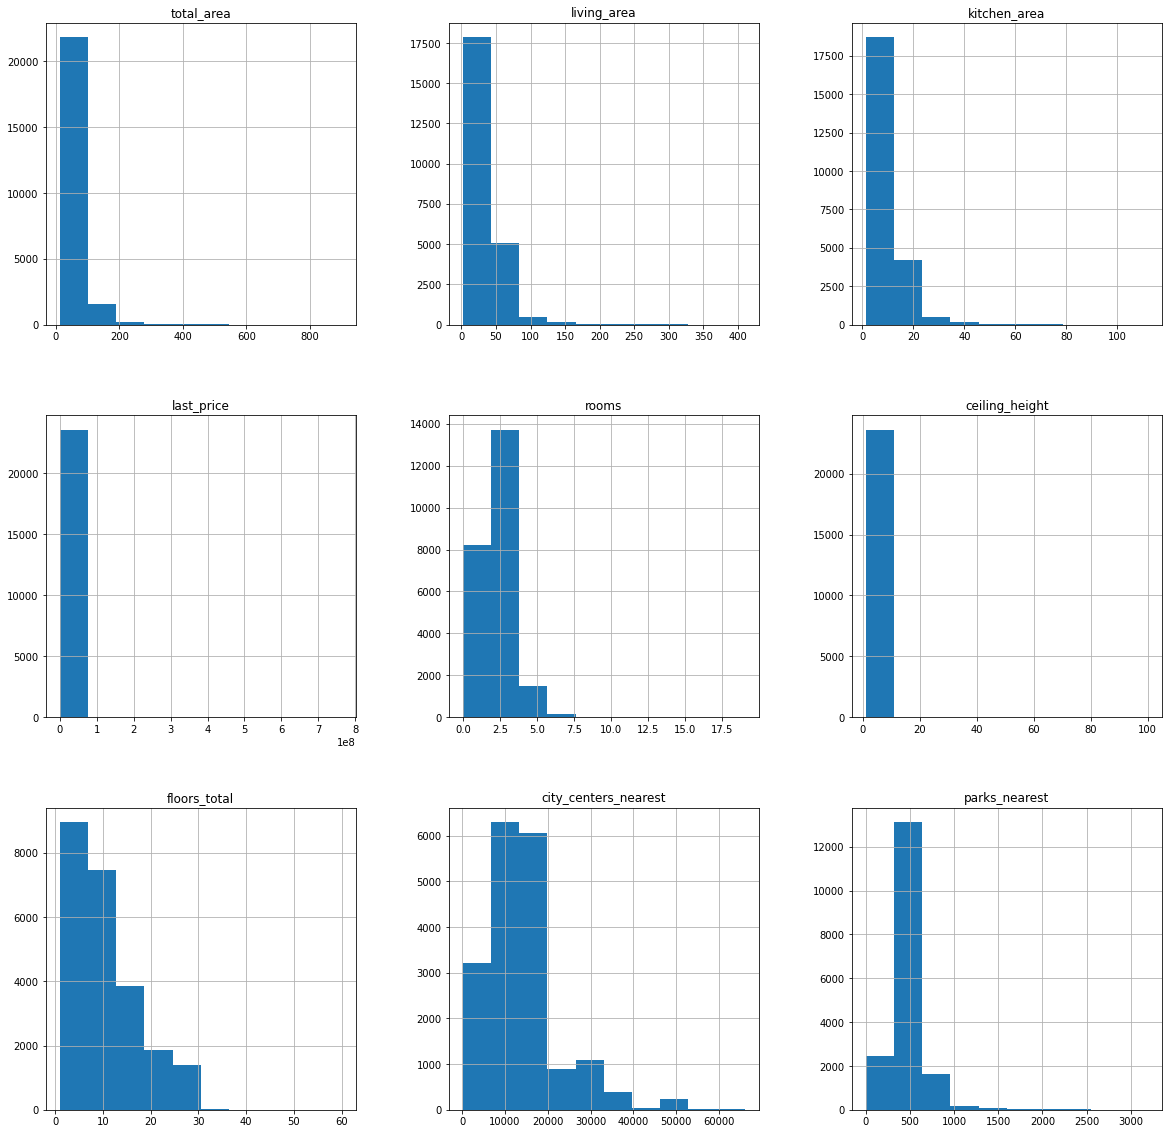

In [506]:
hist_list = [
    'total_area', 
    'living_area', 
    'kitchen_area', 
    'last_price', 
    'rooms', 
    'ceiling_height', 
    'floor_type', 
    'floors_total', 
    'city_centers_nearest', 
    'parks_nearest']

data[hist_list].hist(figsize=(20, 20))
plt.show()

In [507]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,city_centers_nearest_km
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23565.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18264.000000,18140.000000,17652.000000,18140.000000,9085.000000,23570.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,18264.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.771369,10.675875,34.729598,5.893277,10.366450,0.591712,28803.225878,14238.311761,0.611577,475.966321,0.769680,518.059879,170.193148,9.943225e+04,2.568710,6.401564,2017.370021,14.231329
std,5.682278,1.089640e+07,35.661808,1.078620,0.987489,6.594823,22.498513,4.883317,5.956263,0.959662,12637.314144,8624.455713,0.802003,235.650384,0.937948,277.841733,207.234488,5.033794e+04,1.788808,3.491418,1.037806,8.632468
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.750000,9289.000000,0.000000,428.500000,0.000000,293.000000,45.000000,7.661496e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.771499,9.000000,30.000000,4.000000,9.000000,0.000000,26756.500000,13107.000000,0.000000,460.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.771499,16.000000,42.300000,8.000000,11.800000,1.000000,37294.000000,16318.250000,1.000000,460.000000,1.000000,730.000000,201.000000,1.142742e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


In [508]:
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data['ceiling_height'] / 10 # Уменьшим высоту потолков
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,city_centers_nearest_km
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23565.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18264.000000,18140.000000,17652.000000,18140.000000,9085.000000,23570.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,18264.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.744753,10.675875,34.729598,5.893277,10.366450,0.591712,28803.225878,14238.311761,0.611577,475.966321,0.769680,518.059879,170.193148,9.943225e+04,2.568710,6.401564,2017.370021,14.231329
std,5.682278,1.089640e+07,35.661808,1.078620,0.235519,6.594823,22.498513,4.883317,5.956263,0.959662,12637.314144,8624.455713,0.802003,235.650384,0.937948,277.841733,207.234488,5.033794e+04,1.788808,3.491418,1.037806,8.632468
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.750000,9289.000000,0.000000,428.500000,0.000000,293.000000,45.000000,7.661496e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.771499,9.000000,30.000000,4.000000,9.000000,0.000000,26756.500000,13107.000000,0.000000,460.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.771499,16.000000,42.300000,8.000000,11.800000,1.000000,37294.000000,16318.250000,1.000000,460.000000,1.000000,730.000000,201.000000,1.142742e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


In [509]:
data.loc[data['living_area'] < 5, 'living_area'] = data['living_area'] * 10 # Увеличим жилую площадь, 
# так как общая площадь большая у этих объектов
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,city_centers_nearest_km
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23565.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18264.000000,18140.000000,17652.000000,18140.000000,9085.000000,23570.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,18264.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.744753,10.675875,34.733404,5.893277,10.366450,0.591712,28803.225878,14238.311761,0.611577,475.966321,0.769680,518.059879,170.193148,9.943225e+04,2.568710,6.401564,2017.370021,14.231329
std,5.682278,1.089640e+07,35.661808,1.078620,0.235519,6.594823,22.495057,4.883317,5.956263,0.959662,12637.314144,8624.455713,0.802003,235.650384,0.937948,277.841733,207.234488,5.033794e+04,1.788808,3.491418,1.037806,8.632468
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.750000,9289.000000,0.000000,428.500000,0.000000,293.000000,45.000000,7.661496e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.771499,9.000000,30.000000,4.000000,9.000000,0.000000,26756.500000,13107.000000,0.000000,460.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.771499,16.000000,42.300000,8.000000,11.800000,1.000000,37294.000000,16318.250000,1.000000,460.000000,1.000000,730.000000,201.000000,1.142742e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


In [510]:
data.loc[data['rooms'] == 0, 'rooms'] = None # Избавимся от значения "0" в столбце "количество комнат"
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,city_centers_nearest_km
count,23650.000000,2.365000e+04,23650.000000,23453.000000,23650.000000,23565.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18264.000000,18140.000000,17652.000000,18140.000000,9085.000000,23570.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,18264.000000
mean,9.862326,6.541127e+06,60.329069,2.087494,2.744753,10.675875,34.733404,5.893277,10.366450,0.591712,28803.225878,14238.311761,0.611577,475.966321,0.769680,518.059879,170.193148,9.943225e+04,2.568710,6.401564,2017.370021,14.231329
std,5.682278,1.089640e+07,35.661808,1.066253,0.235519,6.594823,22.495057,4.883317,5.956263,0.959662,12637.314144,8624.455713,0.802003,235.650384,0.937948,277.841733,207.234488,5.033794e+04,1.788808,3.491418,1.037806,8.632468
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.750000,9289.000000,0.000000,428.500000,0.000000,293.000000,45.000000,7.661496e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.771499,9.000000,30.000000,4.000000,9.000000,0.000000,26756.500000,13107.000000,0.000000,460.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.771499,16.000000,42.300000,8.000000,11.800000,1.000000,37294.000000,16318.250000,1.000000,460.000000,1.000000,730.000000,201.000000,1.142742e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


Были явные аномалии в столбце "высота потолков", т.к. трудно представить такое помещение жилое. Убрал нулевое значение в количестве комнат. Увеличил жилую площадь объектов, которые были меньше 5 квадратных метров.

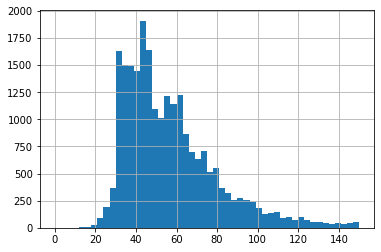

In [511]:
# Посмотрим общую площадь.

data['total_area'].hist(bins=50, range=(0, 150))
plt.show()

In [512]:
# Из гистограммы можно увидеть, что большинсво квартир в диапазоне от 30 до 80 квадратных метров по общей площади.

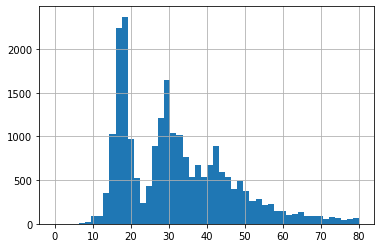

In [513]:
# Посмотрим жилую площадь.

data['living_area'].hist(bins=50, range=(0, 80))
plt.show()

In [514]:
# Из гистограммы можно увидеть, что существует перепад в распрделении по жилой площади: от 15 до 22 и от 25 до 45, примерно.

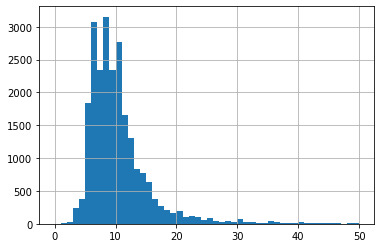

In [515]:
# Посмотрим площадь кухни.

data['kitchen_area'].hist(bins=50, range=(0, 50))
plt.show()

In [516]:
# Из гистограммы выдно, что большинство объектов имеют, ожидаемую площадь от 5 до 15 квадратных метров.

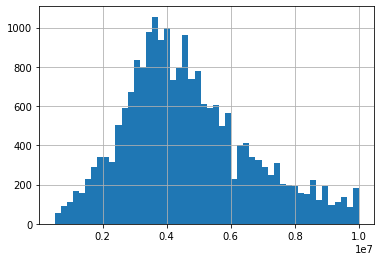

In [517]:
# Посмотрим цены. Из опыта можно сказать, что стоимость жилья может достигать и 10, 
# и 30 миллионов рублей. Выставим соответствующий "range", чтобы "раскрыть" гистограмму.

data['last_price'].hist(bins=50, range=(500000, 10000000))
plt.show()

In [518]:
# Можем сказать, что стоимость болшинства квартир лежит в области от 2.5 млн. до 6 млн. рублей.

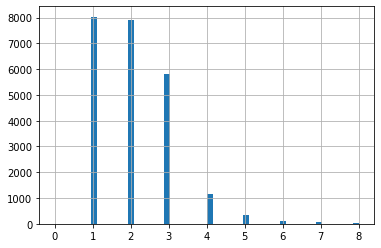

In [519]:
# Посмотрим распределение количества комнат по объектам недвижимости.

data['rooms'].hist(bins=50, range=(0, 8))
plt.show()

In [520]:
# Из гистограммы видно, ожидаемо, что больше всего квартир, у которых от 1 до 3 комнат.

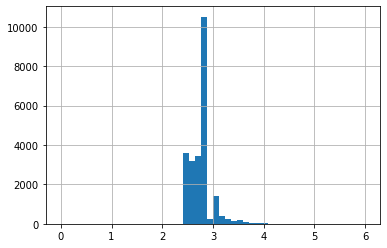

In [521]:
# Посмотрим распределение высоты потолков по объектам недвижимости.
# Тут не ожидаем сюрпризов, т.к. выше выравнивали этот столбец.

data['ceiling_height'].hist(bins=50, range=(0, 6))
plt.show()

In [522]:
# Ожидаемо, что у большинства от 2.5 до 2.8

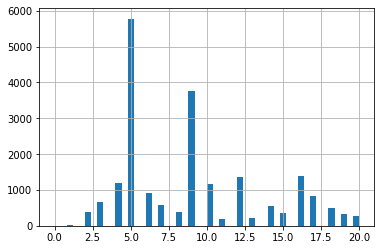

In [523]:
# Посмотрим распределение высоты потолков по объектам недвижимости.
# Тут не ожидаем сюрпризов, т.к. выше выравнивали этот столбец.

data['floors_total'].hist(bins=50, range=(0, 20))
plt.show()

In [524]:
# Большинство зданий - это 5 и 9 этажные здания.

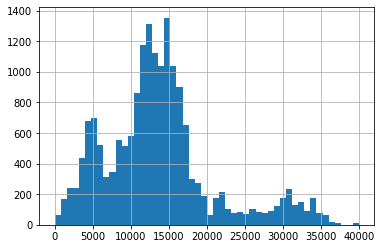

In [525]:
# Растояние до центра.

data['city_centers_nearest'].hist(bins=50, range=(0, 40000))
plt.show()

In [526]:
# Большинство квартир расположены на расслтоянии от 3 до 17 км. от центра.

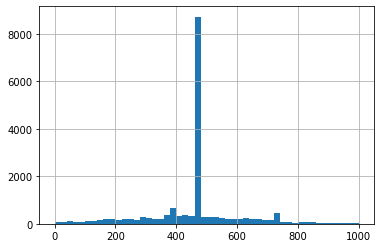

In [527]:
# Растояние до ближайших парков.

data['parks_nearest'].hist(bins=50, range=(0, 1000))
plt.show()

In [528]:
# Большинство объектов недвижимости имеет ближайший парк на растоянии 400-500 метров.

Опишим все ваши наблюдения по параметрам: 
- типичный объект недвижимости имеют общую площадь в диапазоне от 30 до 80 квадратных метров;
- 15 до 45 кв. метров жилой площади;
- площадь кухни от 5 до 15 квадратных метров;
- стоимость болшинства квартир лежит в области от 2.5 млн. до 6 млн. рублей;
- больше всего квартир, у которых от 1 до 3 комнат;
- высота потолков от 2.5 до 2.8;
- этажность зданий, чаще всего: 5 и 9 этажей;
- большинство квартир расположены на расслтоянии от 3 до 17 км. от центра;
- большинство объектов недвижимости имеет ближайший парк на растоянии 400-500 метров.

Изучим, как быстро продавались квартиры (столбец days_exposition).

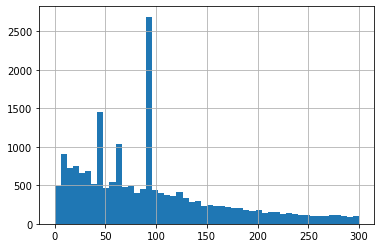

In [529]:
data['days_exposition'].hist(bins=50, range=(0, 300))
plt.show()

In [530]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

170.19314806957996
95.0


Медиана и среднне отличаются почти в два раза, а это значит, что существует большое количество объектов, которые "портят" среднее значение. 

Быстрые продажи до 75 дней, средние от 75 до 150, долгие продажи от 150 и более.

Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров.

In [531]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'price_square_meter', 'weekday',
       'month', 'year', 'floor_type', 'city_centers_nearest_km'],
      dtype='object')

In [532]:
columns = [
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'floor_type',
    'weekday',
    'month',
    'year',
]

data_new = data[columns].corr()

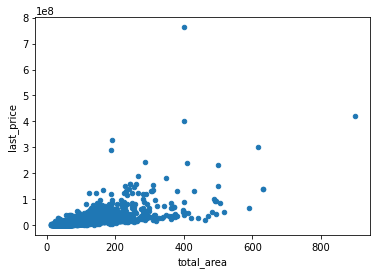

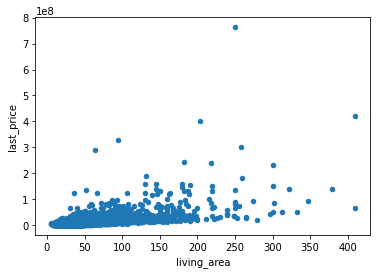

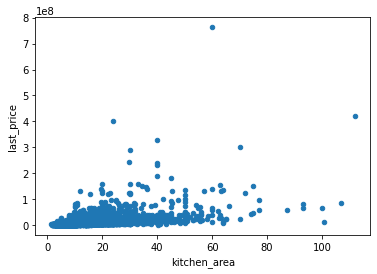

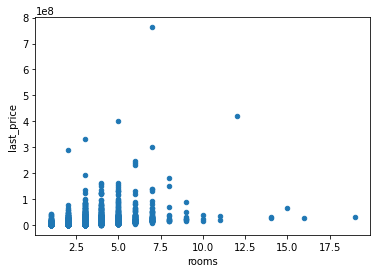

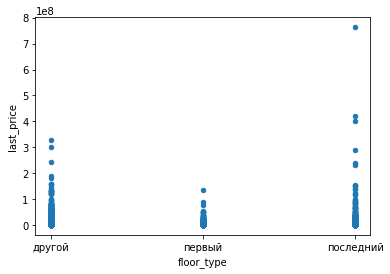

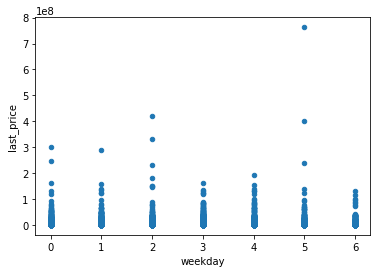

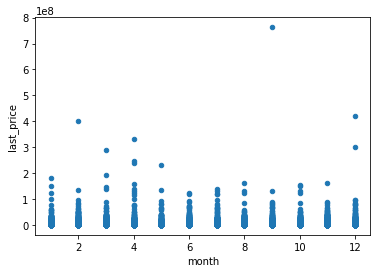

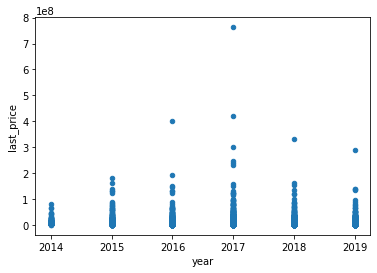

In [533]:
data.plot(x='total_area', y ='last_price', kind ='scatter')
data.plot(x='living_area', y ='last_price', kind ='scatter')
data.plot(x='kitchen_area', y ='last_price', kind ='scatter')
data.plot(x='rooms', y ='last_price', kind ='scatter')
data.plot(x='floor_type', y ='last_price', kind ='scatter')
data.plot(x='weekday', y ='last_price', kind ='scatter')
data.plot(x='month', y ='last_price', kind ='scatter')
data.plot(x='year', y ='last_price', kind ='scatter')
plt.show()

In [534]:
# Можно сделать вывод, что больше всего влияет общая площадь на стоимость квартры, а отсюда и высокая кореляция с
# жилой площадью и площадью кухни. Также есть зависимость от количества комнат. Меньше всего зависимость от того, когда
# было размещено объявление о продаже. И чаще покупают не первый этаж.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построем сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [535]:
top_ten=data.pivot_table(index='locality_name',values='price_square_meter',aggfunc=('count','mean'))
top_ten.sort_values(by='count',ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008793
поселок Мурино,590,86087.512017
Кудрово,472,95324.930508
поселок Шушары,440,78677.364318
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
поселок Парголово,327,90175.913089
Гатчина,307,68746.146515


In [536]:
# Самая высокая стоимостью квадратного метра в Санкт-петербурге, а самая низкая из топа - в Выборге.

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра. Учтем каждый километр расстояния: узнаем среднюю цену квартир в одном километре от центра, в двух и так далее. Опишим, как стоимость объектов зависит от расстояния до центра города — построем график изменения средней цены для каждого километра от центра Петербурга.

                         price_square_meter
city_centers_nearest_km                    
0.0                           245833.530370
1.0                           177005.407604
2.0                           157849.007290
3.0                           121387.453743
4.0                           133282.874738
5.0                           140509.789022
6.0                           151012.193673
7.0                           156176.879524
8.0                           125671.442864
9.0                           113131.041939
10.0                          112727.516968
11.0                          108630.835357
12.0                          109271.694802
13.0                          108148.127893
14.0                          104252.384949
15.0                          104231.976231
16.0                          100542.613929
17.0                           96597.652288
18.0                           96362.263870
19.0                           98652.735732
20.0                          10

<AxesSubplot:xlabel='city_centers_nearest_km'>

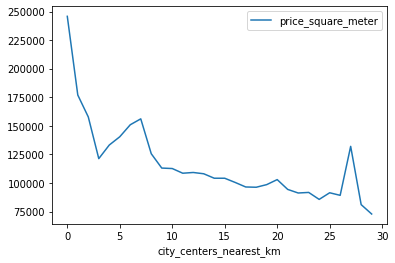

In [537]:
spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='city_centers_nearest_km',values='price_square_meter', aggfunc='mean')

print(spb)
spb.plot()

In [538]:
# Из графика видно, что самое дорогое жилье в центре. Уже на первом км. резкое падение в стоимости, далее, примерно, на 5-7 км. 
# вновь можно видеть скачок в цене, но потом продолжается равномерное снижение на 8 км. Есть скачок в цене на 27 км., но,
# возможно, дорогая загородная недвижимость повлияла на среднее значение. 

### Напишите общий вывод

Подводя итог можно сделать следующие выводы:

Наиболее часто в объявлениях встречаются объекты недвижимости, имеющие следующие характеристики:
- общую площадь в диапазоне от 30 до 80 квадратных метров;
- 15 до 45 кв. метров жилой площади;
- площадь кухни от 5 до 15 квадратных метров;
- стоимость болшинства квартир лежит в области от 2.5 млн. до 6 млн. рублей;
- больше всего квартир, у которых от 1 до 3 комнат;
- высота потолков от 2.5 до 2.8;
- этажность зданий, чаще всего: 5 и 9 этажей;
- большинство квартир расположены на расслтоянии от 3 до 17 км. от центра;
- большинство объектов недвижимости имеет ближайший парк на растоянии 400-500 метров.

Если приобретать жилую недвижимость в Санкт-Петербурге, то лучше остановится на отдаленности от центра в 10 км.,
т.к. далее от центра цена меняется не сильно, но расстояние увеличивается. Ближе 10 км. к центру цена начинает возрастать уже существенно.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.